In [104]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [102]:
#Read data for all of the days
import pandas as pd
df = pd.read_csv('C:/Users/FRA228/OneDrive - University of Kentucky/DiDi/Data/alldaydata.csv')
df.head()

,Date Time,TimeStamp,Longitude,Latitude,Lat_shift,Long Shift,Dist,time_shifted,time_interval,Dist_mile,speed,TT_min,cov
0,11/6/2016 7:00,1478433756,104.061416,30.694562,104.061431,30.694562,0.027785,1.478434e+09,247.639147,0.017265,7.540769,17.027440,0.025460
1,11/6/2016 6:50,1478433156,104.061919,30.694529,104.061898,30.694529,0.022084,1.478433e+09,206.428761,0.013723,7.817262,16.425189,0.025460
2,11/4/2016 6:30,1478255544,104.061677,30.694574,104.061763,30.694589,0.020673,1.478255e+09,110.223041,0.012846,8.443786,15.206449,0.025864
3,11/4/2016 6:15,1478254652,104.060279,30.694574,104.060736,30.694567,0.024514,1.478254e+09,173.113381,0.015233,8.562227,14.996099,0.025864
4,11/4/2016 6:35,1478255854,104.061038,30.694548,104.061677,30.694574,0.025172,1.478256e+09,162.635363,0.015641,8.686606,14.781377,0.025864


In [98]:
morn.head()

,Date Time,TimeStamp,Longitude,Latitude,Lat_shift,Long Shift,Dist,time_shifted,time_interval,Dist_mile,...,TT_min,logTT,mu,sigma,p1,p2,theo_dist,cov,DAY,DOW
2,11/4/2016 6:30,1478255544,104.061677,30.694574,104.061763,30.694589,0.020673,1.478255e+09,110.223041,0.012846,...,15.206449,2.721720,8.04627,1.699422,0.015438,135.412563,2.090448,0.025864,2016-11-04 06:30:00,4
3,11/4/2016 6:15,1478254652,104.060279,30.694574,104.060736,30.694567,0.024514,1.478254e+09,173.113381,0.015233,...,14.996099,2.707790,8.04627,1.699422,0.015654,138.939843,2.174988,0.025864,2016-11-04 06:15:00,4
4,11/4/2016 6:35,1478255854,104.061038,30.694548,104.061677,30.694574,0.025172,1.478256e+09,162.635363,0.015641,...,14.781377,2.693368,8.04627,1.699422,0.015882,142.698772,2.266281,0.025864,2016-11-04 06:35:00,4
5,11/4/2016 6:05,1478254049,104.061028,30.694578,104.061613,30.694587,0.024372,1.478254e+09,176.232008,0.015144,...,14.741531,2.690669,8.04627,1.699422,0.015924,143.414680,2.283807,0.025864,2016-11-04 06:05:00,4
6,11/4/2016 6:40,1478256142,104.060929,30.694565,104.061038,30.694548,0.023485,1.478256e+09,107.260910,0.014593,...,14.605784,2.681418,8.04627,1.699422,0.016072,145.898399,2.344952,0.025864,2016-11-04 06:40:00,4


In [95]:
#Loading data for morning, midday, evening and night time for all the days
morn = pd.read_csv('C:/Users/FRA228/OneDrive - University of Kentucky/DiDi/Data/morning data_15 days.csv')
mid = pd.read_csv('C:/Users/FRA228/OneDrive - University of Kentucky/DiDi/Data/Midday.csv')
even = pd.read_csv('C:/Users/FRA228/OneDrive - University of Kentucky/DiDi/Data/evening data.csv')
night = pd.read_csv('C:/Users/FRA228/OneDrive - University of Kentucky/DiDi/Data/night.csv')

#Filtering out the non-holiday weekday data
morn['DAY']=pd.to_datetime(morn['Date Time'])
morn['DOW']=morn.DAY.dt.dayofweek
morn=morn[morn['DOW']<5]
mid['DAY']=pd.to_datetime(mid['date_time'])
mid['DOW']=mid.DAY.dt.dayofweek
mid=mid[mid['DOW']<5]
even['DAY']=pd.to_datetime(even['date_time'])
even['DOW']=even.DAY.dt.dayofweek
even=even[even['DOW']<5]
night['DAY']=pd.to_datetime(night['date_time'])
night['DOW']=night.DAY.dt.dayofweek
night=night[night['DOW']<5]

In [74]:
# For reliability separating data for weekdays: sat, sun, tues, wed, thurs
df0=df[df['DOW']== 0]
df1=df[df['DOW']== 1]
df2=df[df['DOW']== 2]
df3=df[df['DOW']== 3]
df4=df[df['DOW']== 4]


In [75]:
df0

,Date Time,TimeStamp,Longitude,Latitude,Lat_shift,Long Shift,Dist,time_shifted,time_interval,Dist_mile,speed,TT_min,cov,DAY,DOW
24,11/7/2016 6:20,1478517748,104.069446,30.694609,104.069434,30.694608,0.033749,1.478517e+09,262.053018,0.020971,11.034505,11.636226,0.054323,2016-11-07 06:20:00,0
45,11/7/2016 6:00,1478516553,104.064885,30.694570,104.064903,30.694570,0.044048,1.478516e+09,405.359275,0.027370,11.983824,10.714443,0.054323,2016-11-07 06:00:00,0
49,11/7/2016 6:25,1478518049,104.070855,30.694605,104.070896,30.694603,0.031927,1.478518e+09,242.782868,0.019838,12.274473,10.460734,0.054323,2016-11-07 06:25:00,0
59,11/7/2016 6:15,1478517446,104.068666,30.694580,104.068650,30.694581,0.030840,1.478517e+09,178.493538,0.019163,12.600718,10.189896,0.054323,2016-11-07 06:15:00,0
69,11/7/2016 6:10,1478517159,104.066323,30.694574,104.066274,30.694573,0.034436,1.478517e+09,251.826022,0.021397,12.846402,9.995016,0.060484,2016-11-07 06:10:00,0
78,11/7/2016 6:05,1478516849,104.065765,30.694568,104.065778,30.694567,0.036910,1.478517e+09,263.297601,0.022935,13.347014,9.620129,0.060484,2016-11-07 06:05:00,0
83,11/7/2016 6:30,1478518345,104.066992,30.694595,104.067026,30.694594,0.040472,1.478518e+09,291.042046,0.025148,13.611564,9.433155,0.060484,2016-11-07 06:30:00,0
113,11/7/2016 6:40,1478518945,104.066310,30.694581,104.066340,30.694581,0.042787,1.478519e+09,246.434718,0.026587,14.525222,8.839796,0.060484,2016-11-07 06:40:00,0
116,11/7/2016 6:35,1478518651,104.066666,30.694589,104.066711,30.694588,0.038117,1.478518e+09,300.741692,0.023685,14.547143,8.826475,0.060484,2016-11-07 06:35:00,0
118,11/7/2016 6:45,1478519252,104.065233,30.694583,104.065239,30.694583,0.039734,1.478519e+09,270.798478,0.024690,14.607761,8.789848,0.060484,2016-11-07 06:45:00,0


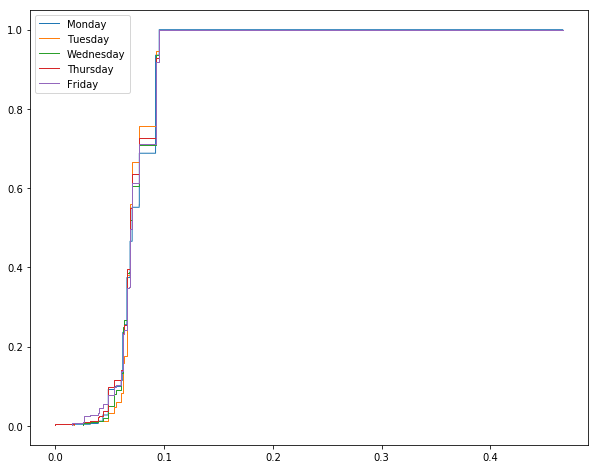

In [84]:
#LOS based on  COV and same code applied for average travel time
plt.figure(figsize=(10,8))
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

sorted_data_0 =np.sort(df0['cov'])
sorted_data_1 =np.sort(df1['cov'])
sorted_data_2 =np.sort(df2['cov'])
sorted_data_3 =np.sort(df3['cov'])
sorted_data_4 =np.sort(df4['cov'])


y_base_0 = np.arange(1, len(sorted_data_0)+1)/len(sorted_data_0)
y_base_1 = np.arange(1, len(sorted_data_1)+1)/len(sorted_data_1)
y_base_2 = np.arange(1, len(sorted_data_2)+1)/len(sorted_data_2)
y_base_3 = np.arange(1, len(sorted_data_3)+1)/len(sorted_data_3)
y_base_4 = np.arange(1, len(sorted_data_4)+1)/len(sorted_data_4)




plt.step(sorted_data_0, y_base_0,linewidth=1, label='Monday')
plt.step(sorted_data_1, y_base_1,linewidth=1, label='Tuesday')
plt.step(sorted_data_2, y_base_2,linewidth=1, label='Wednesday')
plt.step(sorted_data_3, y_base_3,linewidth=1, label='Thursday')
plt.step(sorted_data_4, y_base_4,linewidth=1, label='Friday')
plt.legend()

plt.show()

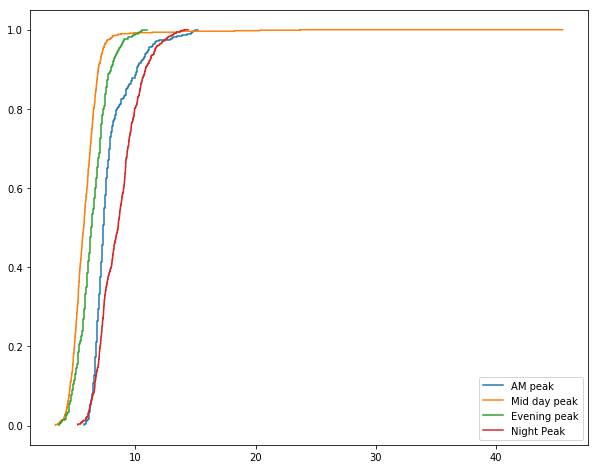

In [97]:
#Pattern for different days of the week
plt.figure(figsize=(10,8))
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

sorted_data_0 =np.sort(morn['TT_min'])
sorted_data_1 =np.sort(mid['TT_min'])
sorted_data_2 =np.sort(even['TT_min'])
sorted_data_3 =np.sort(night['TT_min'])



y_base_0 = np.arange(1, len(sorted_data_0)+1)/len(sorted_data_0)
y_base_1 = np.arange(1, len(sorted_data_1)+1)/len(sorted_data_1)
y_base_2 = np.arange(1, len(sorted_data_2)+1)/len(sorted_data_2)
y_base_3 = np.arange(1, len(sorted_data_3)+1)/len(sorted_data_3)




plt.step(sorted_data_0, y_base_0,linewidth=1.5, label='AM peak')
plt.step(sorted_data_1, y_base_1,linewidth=1.5, label='Mid day peak')
plt.step(sorted_data_2, y_base_2,linewidth=1.5, label='Evening peak')
plt.step(sorted_data_3, y_base_3,linewidth=1.5, label='Night Peak')

plt.legend()

plt.show()

In [87]:
#percentiles: for all data for each weekdays
p0 = np.percentile(df0['cov'], 50)
p1 = np.percentile(df1['cov'], 50)
p2 = np.percentile(df2['cov'], 50)
p3 = np.percentile(df3['cov'], 50)
p4 = np.percentile(df4['cov'], 50)
print(p0,p1, p2,p3,p4)

0.070563936 0.068654636 0.068654636 0.068654636 0.070563936


In [83]:
speed0 = (1*60)/p0
speed1 = (1*60)/p1
speed2 = (1*60)/p2
speed3 = (1*60)/p3
speed4 = (1*60)/p4
print(speed0,speed1, speed2,speed3,speed4)

13.9944766387 15.7939929967 14.1917239226 13.9104659132 14.4700534145


In [28]:
#85th percentile of speed for monday
p0_85th = np.percentile(df0['TT_min'], 85)
speed0_85th = (2.14*60)/p0_85th
speed0_85th

15.214476413560163

In [10]:
df.head()

,Date Time,TimeStamp,Longitude,Latitude,Lat_shift,Long Shift,Dist,time_shifted,time_interval,Dist_mile,speed,TT_min,logTT,mu,sigma,p1,p2,theo_dist,DAY,DOW
0,11/1/2016 6:00,1477994551,104.065762,30.694591,0.000000,0.000000,0.037145,1.477994e+09,288.386724,0.023081,11.194055,11.470375,2.439768,8.04627,1.699422,0.020466,230.883337,4.725234,2016-11-01 06:00:00,1
1,11/1/2016 6:05,1477994844,104.065069,30.694594,104.065762,30.694591,0.032636,1.477995e+09,202.255886,0.020279,12.032586,10.671022,2.367532,8.04627,1.699422,0.021999,265.880269,5.849091,2016-11-01 06:05:00,1
2,11/1/2016 6:10,1477995152,104.063782,30.694590,104.065069,30.694594,0.036968,1.477995e+09,261.518066,0.022971,12.805226,10.027156,2.305297,8.04627,1.699422,0.023412,300.692744,7.039689,2016-11-01 06:10:00,1
3,11/1/2016 6:15,1477995447,104.064563,30.694591,104.063782,30.694590,0.034893,1.477995e+09,200.628892,0.021682,12.815052,10.019468,2.304530,8.04627,1.699422,0.023430,301.151620,7.055843,2016-11-01 06:15:00,1
4,11/1/2016 6:20,1477995750,104.065203,30.694587,104.064563,30.694591,0.037765,1.477996e+09,236.940761,0.023466,12.793429,10.036402,2.306219,8.04627,1.699422,0.023390,300.142388,7.020331,2016-11-01 06:20:00,1


(array([0.02869874, 0.01913249, 0.14349371, 0.13392746, 0.31568616,
        0.44961362, 0.39221614, 0.44004737, 0.53570984, 0.39221614,
        0.28698742, 0.30611991, 0.20089119, 0.20089119, 0.21045744,
        0.09566247, 0.10522872, 0.11479497, 0.09566247, 0.07652998,
        0.03826499, 0.03826499, 0.06696373, 0.08609623, 0.05739748,
        0.02869874, 0.04783124, 0.04783124, 0.05739748, 0.02869874,
        0.01913249, 0.03826499, 0.00956625, 0.01913249, 0.00956625,
        0.00956625, 0.        , 0.00956625, 0.01913249, 0.00956625,
        0.        , 0.01913249, 0.        , 0.00956625, 0.00956625,
        0.01913249, 0.        , 0.01913249, 0.00956625, 0.00956625,
        0.00956625, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00956625, 0.        , 0.        , 0.00956625]),
 array([ 5.72644591,  5.91479582,  6.10314573,  6.29149564,  6.47984555,
         6.66819546,  6.85654537,  7.04489528,  7.23324518,  7.42159509,
         7.609945  ,  7.79829491,  7

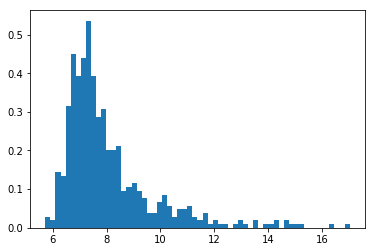

In [32]:
#trying some distribution model for travel time data
%matplotlib inline
plt.hist(data['TT_min'], 60, normed=True)


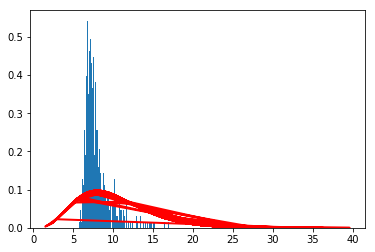

In [62]:
plt.figure(figsize=(12,10))
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
#alpha, loc, beta=5, 100, 22
myHist = plt.hist(df['TT_min'], 100, normed=True)
#rv = ss.gamma(alpha,loc,beta)
plt.plot(df['theo_dist'], stats.chi2.pdf(df['theo_dist'], df=10), color='r', lw=2)
plt.show()

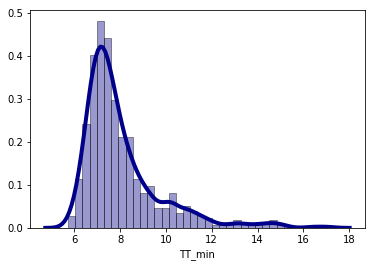

In [61]:
#KDE model
import seaborn as sns
# Density Plot and Histogram of all arrival delays
sns.distplot(df['TT_min'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

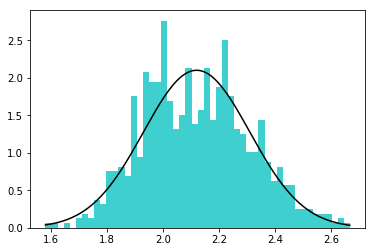

In [65]:
plt.figure(figsize=(10,8))
#lognormal dist:
import matplotlib.pyplot as plt
%matplotlib inline
s, loc, scale = stats.lognorm.fit(df['TT_min'], floc=0)
estimated_mu = np.log(scale)
estimated_sigma = s

logdata = np.log(df['TT_min'])
plt.hist(logdata, bins=50, normed=True, color='c', alpha=0.75)
xmin = logdata.min()
xmax = logdata.max()
x = np.linspace(xmin, xmax, 150)
pdf = stats.norm.pdf(x, loc=estimated_mu, scale=estimated_sigma)
plt.plot(x, pdf, 'k')

In [ ]:

from scipy import stats  
import numpy as np  
import matplotlib.pylab as plt

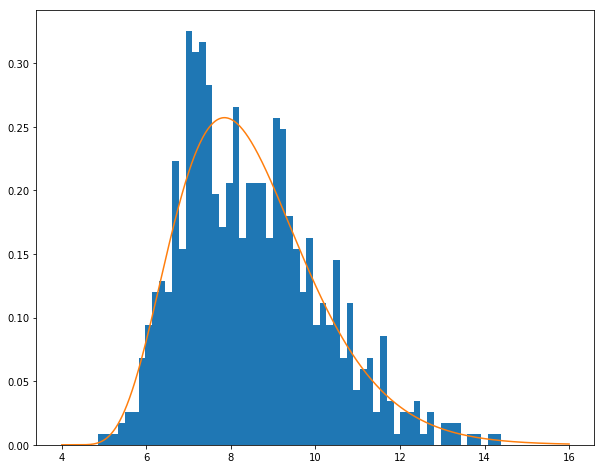

In [67]:
#gamma dist
# create some normal random noisy data
plt.figure(figsize=(10,8))
ser = df['TT_min']

# plot normed histogram
plt.hist(ser,bins=60, normed=True)

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(ser))
# exactly same as above
ag,bg,cg = stats.gamma.fit(ser)  
pdf_gamma = stats.gamma.pdf(lnspc, ag, bg,cg)  
plt.plot(lnspc, pdf_gamma, label="Gamma")

In [68]:
#hypothesis testing for lognormal
import scipy.stats as stats
print(stats.kstest(df['TT_min'], "lognorm", stats.lognorm.fit(df['TT_min'])))

KstestResult(statistic=0.042891462486532084, pvalue=0.130019182728075)


In [69]:
#hypothesis testing for gamma
from scipy import stats
stats.kstest(df['TT_min'], 'gamma', args=(ag,bg,cg))

KstestResult(statistic=0.041774650644645805, pvalue=0.14952954093958071)